<a href="https://colab.research.google.com/github/torifinch/Forecasting_app/blob/main/Grocery_Naive_SARIMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Grocery Time Series Model Foundations

1. Check stationarity
2. Visualize ACF/PACF
3. Fit a Naive forecast
4. Fit a SARIMA model

###Import & Load Data

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

In [103]:
# Plotting style
sns.set(rc={'figure.figsize':(12, 6)})

In [104]:
# Load a specific store and item
df = pd.read_csv('/content/final_train1.csv', parse_dates=['date'])
df = df[(df['store_nbr'] == 51) & (df['item_nbr'] == 789224)]
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
monthly_df = df.groupby('month')['unit_sales'].sum().to_frame(name='value')
monthly_df.index = pd.to_datetime(monthly_df.index)
monthly_df = monthly_df.asfreq('MS')

In [105]:
# Add dropna here to remove any NaN values introduced by asfreq
monthly_df.dropna(inplace=True)

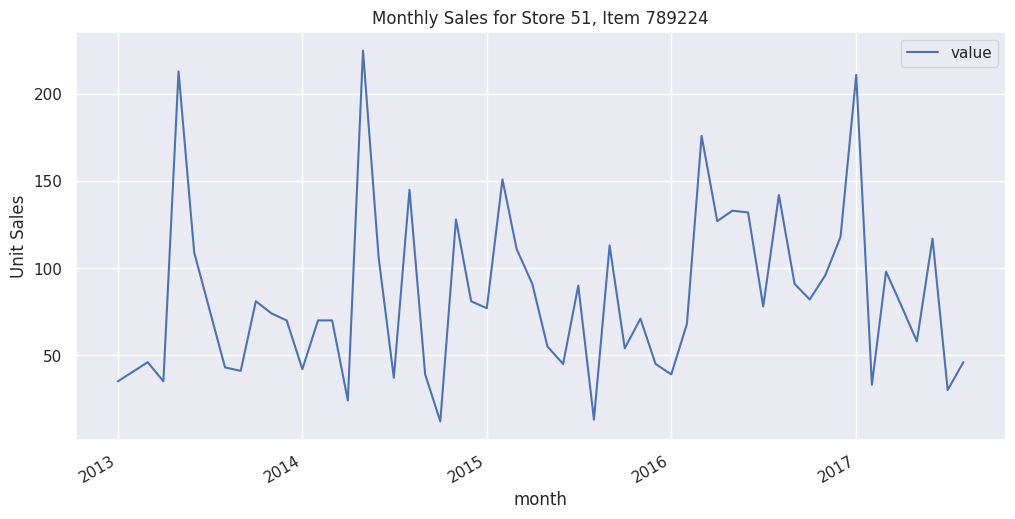

In [106]:
# Visualize raw data
monthly_df.plot(title='Monthly Sales for Store 51, Item 789224')
plt.ylabel("Unit Sales")
plt.show()

###Stationarity

In [107]:
# Check stationarity with ADF Test
result = adfuller(monthly_df['value'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
if result[1] < 0.05:
    print("✅ Series is stationary.")
else:
    print("⚠️ Series is likely non-stationary.")

ADF Statistic: -7.3040
p-value: 0.0000
✅ Series is stationary.


###ACF & PACF

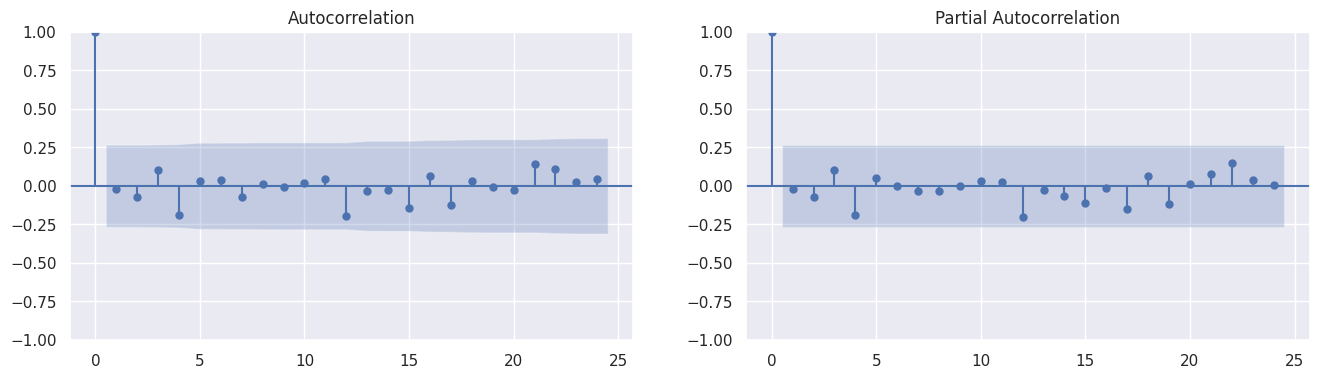

In [108]:
# ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(monthly_df['value'], ax=axes[0], lags=24)
plot_pacf(monthly_df['value'], ax=axes[1], lags=24)
plt.show()

###Naive Forecast

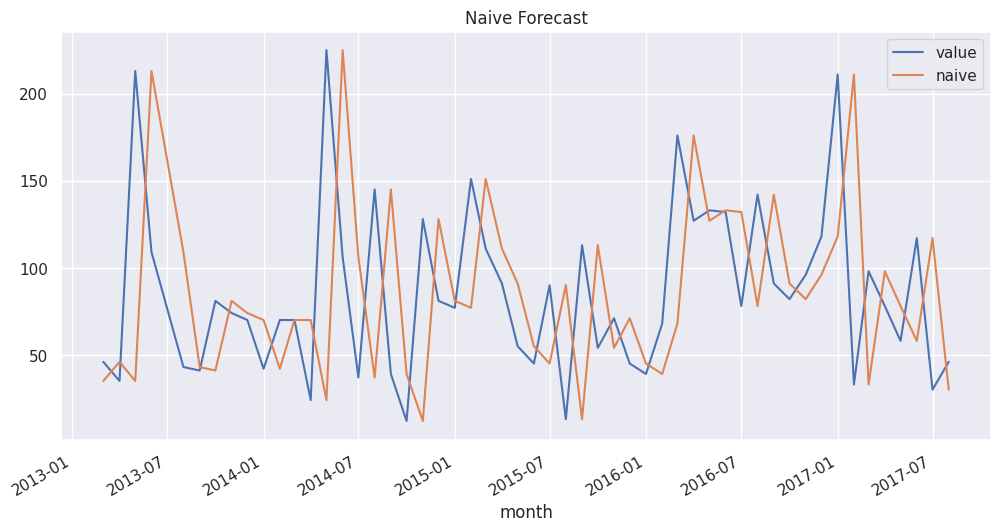

In [109]:
# Naive Forecast
monthly_df['naive'] = monthly_df['value'].shift(1)
# Add dropna here as well, as shift introduces NaN at the beginning
monthly_df.dropna(inplace=True)
monthly_df[['value', 'naive']].plot(title='Naive Forecast')
plt.show()

###SARIMA

In [110]:
# Fit SARIMA
model = sm.tsa.SARIMAX(monthly_df['value'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                   53
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -225.176
Date:                            Sun, 18 May 2025   AIC                            460.352
Time:                                    13:45:08   BIC                            468.796
Sample:                                         0   HQIC                           463.405
                                             - 53                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0633      0.195     -0.324      0.746      -0.446       0.320
ma.L1         -0.9992     15.412   

In [111]:
# Create summary table of model statistics
sarima_summary = {
    "Log Likelihood": model_fit.llf,
    "AIC": model_fit.aic,
    "BIC": model_fit.bic,
    "HQIC": model_fit.hqic
}
summary_table = pd.DataFrame(sarima_summary, index=["SARIMA(1,1,1)(1,1,1,12)"])
print("\nModel Summary Table:")
print(summary_table)



Model Summary Table:
                         Log Likelihood         AIC         BIC        HQIC
SARIMA(1,1,1)(1,1,1,12)     -225.175959  460.351918  468.796316  463.405146


In [112]:
# Fit simpler SARIMA(0,1,1)(0,1,1,12) ---
simple_model = sm.tsa.SARIMAX(monthly_df['value'], order=(0,1,1), seasonal_order=(0,1,1,12))
simple_fit = simple_model.fit(disp=False)
print(simple_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                   53
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -226.214
Date:                            Sun, 18 May 2025   AIC                            458.427
Time:                                    13:47:50   BIC                            463.494
Sample:                                         0   HQIC                           460.259
                                             - 53                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9980      4.597     -0.217      0.828     -10.009       8.013
ma.S.L12      -0.9882     18.320   

In [113]:
# Add to model comparison table
simple_summary = {
    "Log Likelihood": simple_fit.llf,
    "AIC": simple_fit.aic,
    "BIC": simple_fit.bic,
    "HQIC": simple_fit.hqic
}
simple_table = pd.DataFrame(simple_summary, index=["SARIMA(0,1,1)(0,1,1,12)"])
summary_table = pd.concat([summary_table, simple_table])
print("\n📊 Updated Model Comparison Table:")
print(summary_table)


📊 Updated Model Comparison Table:
                         Log Likelihood         AIC         BIC        HQIC
SARIMA(1,1,1)(1,1,1,12)     -225.175959  460.351918  468.796316  463.405146
SARIMA(0,1,1)(0,1,1,12)     -226.213612  458.427223  463.493861  460.259159


## 🧾 Model Comparison Summary

We compared two forecasting models to predict monthly grocery sales:

- **SARIMA(1,1,1)(1,1,1,12)**: A more complex model
- **SARIMA(0,1,1)(0,1,1,12)**: A simpler alternative

Even though the complex model fits slightly better in some respects, the **simpler model actually performed just as well — and even slightly better when we look at the AIC score**, which balances accuracy and simplicity.

 **Bottom line**: Sometimes, simpler models are just as effective — and easier to interpret and maintain. The SARIMA(0,1,1)(0,1,1,12) model gives us solid predictions with less complexity.
